<a href="https://colab.research.google.com/github/abhi005/human-acitivity-recognition/blob/main/human_activity_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-with-rnn/activity_labels.txt
/kaggle/input/human-activity-recognition-with-rnn/sampleSubmission.csv
/kaggle/input/human-activity-recognition-with-rnn/features_info.txt
/kaggle/input/human-activity-recognition-with-rnn/features.txt
/kaggle/input/human-activity-recognition-with-rnn/train.csv
/kaggle/input/human-activity-recognition-with-rnn/test.csv


In [ ]:
from keras.utils import to_categorical

In [ ]:
df = pd.read_csv("../input/human-activity-recognition-with-rnn/train.csv")

In [ ]:
df

,id,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,activity
0,0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5
2,2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5
3,3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5
4,4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,2
7348,7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,2
7349,7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,2
7350,7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,2


In [ ]:
X = df.drop(columns = ['activity', 'id'])
y = pd.DataFrame(df['activity'])

In [ ]:
count = 0
MAX_LENGTH = 0
prev = -1
for i in df.subject.values:
    if i == prev:
        count += 1
        MAX_LENGTH = max(MAX_LENGTH, count)
    else:
        prev = i
        count = 1

print(MAX_LENGTH)

409


In [ ]:
X_train = []
y_train = []
i = 0
while i < len(X):
    cur_sub_X = []
    cur_sub_y = []
    cur = X.subject[i]
    count = 0
    while i < len(X) and X.subject[i] == cur:
        cur_sub_X.append(np.array(X.iloc[i, :-1].values))
        cur_sub_y.append(np.array(y.iloc[i].values - 1))
        count += 1
        i += 1
    repeat_len = count
    while count < MAX_LENGTH:
        cur_sub_X.append(np.array(X.iloc[i - repeat_len + count%repeat_len, :-1].values))
        cur_sub_y.append(np.array(y.iloc[i - repeat_len + count%repeat_len].values - 1))
        count += 1
    X_train.append(np.array(cur_sub_X))
    y_train.append(np.array(cur_sub_y))

In [ ]:
y_train = to_categorical(y_train)

In [ ]:
np.array(X_train).shape

(21, 409, 561)

In [ ]:
np.array(y_train).shape

(21, 409, 6)

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from keras.layers import RepeatVector
from keras.layers import TimeDistributed, LSTM, Dense, GRU, Dropout, BatchNormalization
from keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.optimizers import Nadam
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()
model.add(GRU(256, dropout=0.2, recurrent_dropout=0.2, input_shape=(409, 561), return_sequences = True))
model.add(GRU(512,  dropout=0.3, recurrent_dropout=0.3, return_sequences = True)) 
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(BatchNormalization())
# model.add(Dropout(0.2))
# model.add(Dense(64, activation = 'relu'))
model.add(TimeDistributed(Dense(6, activation = 'softmax')))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_6 (GRU)                  (None, 409, 256)          628992    
_________________________________________________________________
gru_7 (GRU)                  (None, 409, 512)          1182720   
_________________________________________________________________
dense_9 (Dense)              (None, 409, 256)          131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 409, 256)          0         
_________________________________________________________________
dense_10 (Dense)             (None, 409, 64)           16448     
_________________________________________________________________
batch_normalization_5 (Batch (None, 409, 64)           256       
_________________________________________________________________
time_distributed_3 (TimeDist (None, 409, 6)           

In [ ]:
history = model.fit(np.array(X_train), y_train, epochs = 100)

Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 2.2910 - accuracy: 0.1658 - precision_3: 0.1586 - recall_3: 0.0533
Epoch 2/100
1/1 [==============================] - 8s 8s/step - loss: 1.3184 - accuracy: 0.4571 - precision_3: 0.5450 - recall_3: 0.2568
Epoch 3/100
1/1 [==============================] - 8s 8s/step - loss: 1.0169 - accuracy: 0.5874 - precision_3: 0.6773 - recall_3: 0.4232
Epoch 4/100
1/1 [==============================] - 8s 8s/step - loss: 0.8790 - accuracy: 0.6436 - precision_3: 0.7086 - recall_3: 0.5372
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 0.6745 - accuracy: 0.7368 - precision_3: 0.7875 - recall_3: 0.6340
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 0.5513 - accuracy: 0.7926 - precision_3: 0.8320 - recall_3: 0.7202
Epoch 7/100
1/1 [==============================] - 7s 7s/step - loss: 0.5033 - accuracy: 0.8052 - precision_3: 0.8305 - recall_3: 0.7614
Epoch 8/100
1/1 [======================

1/1 [==============================] - 7s 7s/step - loss: 0.0197 - accuracy: 0.9957 - precision_3: 0.9959 - recall_3: 0.9955
Epoch 61/100
1/1 [==============================] - 7s 7s/step - loss: 0.0310 - accuracy: 0.9905 - precision_3: 0.9906 - recall_3: 0.9900
Epoch 62/100
1/1 [==============================] - 7s 7s/step - loss: 0.0200 - accuracy: 0.9951 - precision_3: 0.9951 - recall_3: 0.9951
Epoch 63/100
1/1 [==============================] - 7s 7s/step - loss: 0.0236 - accuracy: 0.9932 - precision_3: 0.9936 - recall_3: 0.9930
Epoch 64/100
1/1 [==============================] - 7s 7s/step - loss: 0.0215 - accuracy: 0.9939 - precision_3: 0.9941 - recall_3: 0.9937
Epoch 65/100
1/1 [==============================] - 7s 7s/step - loss: 0.0169 - accuracy: 0.9953 - precision_3: 0.9955 - recall_3: 0.9949
Epoch 66/100
1/1 [==============================] - 7s 7s/step - loss: 0.0156 - accuracy: 0.9971 - precision_3: 0.9971 - recall_3: 0.9967
Epoch 67/100
1/1 [=============================

In [ ]:
model.save("GRUDrop.h5")

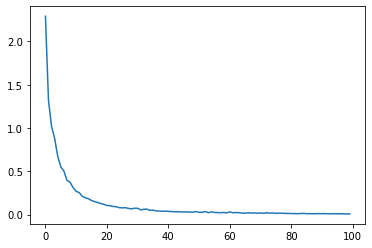

In [ ]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.show()

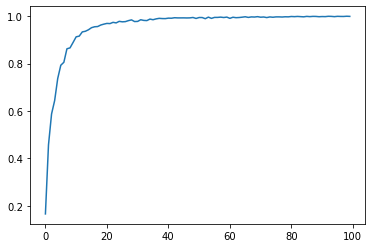

In [ ]:
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
y_pred = np.zeros((21, 409, 6))
for i in range(21):
    y_pred[i] = model.predict(np.array([X_train[i]]))

y_pred = np.argmax(y_pred, axis = 2) + 1

In [ ]:
print(classification_report(np.argmax(y_train, axis = 2).reshape((-1, 1)) + 1, y_pred.reshape((-1, 1))))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1319
           2       1.00      1.00      1.00      1088
           3       1.00      1.00      1.00      1006
           4       1.00      1.00      1.00      1594
           5       1.00      1.00      1.00      1934
           6       1.00      1.00      1.00      1648

    accuracy                           1.00      8589
   macro avg       1.00      1.00      1.00      8589
weighted avg       1.00      1.00      1.00      8589



<AxesSubplot:>

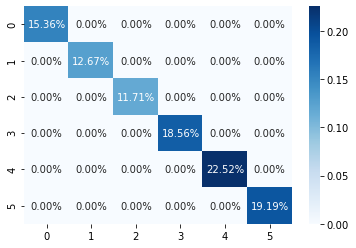

In [ ]:
cf_matrix = confusion_matrix(np.argmax(y_train, axis = 2).reshape((-1, 1)) + 1, y_pred.reshape((-1, 1)))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
df_test = pd.read_csv("../input/human-activity-recognition-with-rnn/test.csv")

In [ ]:
df_test

,id,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,...,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2
1,1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,...,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,...,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2
3,3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,...,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2
4,4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,...,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,24
2943,2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,24
2944,2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,24
2945,2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,24


In [ ]:
X_test_df = df_test.drop(columns = ['id'])

In [ ]:
X_test = []
y_test = []
i = 0
while i < len(X_test_df):
    cur_sub_X = []
    cur = X_test_df.subject[i]
    count = 0
    while i < len(X_test_df) and X_test_df.subject[i] == cur:
        cur_sub_X.append(np.array(X_test_df.iloc[i, :-1].values))
        count += 1
        i += 1
    repeat_len = count
    while count < MAX_LENGTH:
        cur_sub_X.append(np.array(X_test_df.iloc[i - repeat_len + count%repeat_len, :-1].values))
        count += 1
    X_test.append(np.array(cur_sub_X))

In [ ]:
np.array(X_test).shape

(9, 409, 561)

In [ ]:
y_pred = np.zeros((9, 409, 6))
for i in range(9):
    y_pred[i] = model.predict(np.array([X_test[i]]))

y_pred = np.argmax(y_pred, axis = 2) + 1

In [ ]:
y_pred

array([[5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 1, 1, 1],
       [5, 5, 5, ..., 3, 3, 2],
       ...,
       [5, 5, 5, ..., 4, 4, 4],
       [5, 5, 5, ..., 4, 4, 4],
       [5, 5, 5, ..., 5, 5, 5]])

In [ ]:
preds = []
pre = -1
sub = 0
i = 0
while i < len(df_test.subject):
    j = 0
    pre = df_test.subject[i]
    while i < len(df_test.subject) and pre == df_test.subject[i]:
        preds.append(y_pred[sub][j])
        j+=1
        i+=1
    sub+=1
preds

[5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
len(preds)

2947

In [ ]:
ids = [i for i in range(2947)]
df_out = pd.DataFrame(list(zip(ids, preds)),
               columns =['id', 'activity'])
df_out.to_csv('output.csv', index=False)